<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_02_ProjTwo_Supverised_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [247]:
!pip install -q import_ipynb

In [248]:
# utils
import os, sys, warnings, itertools
import import_ipynb
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.io import arff
# colab
from google.colab import drive
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import (linear_model,
                     svm,
                     metrics,
                     preprocessing)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.pipeline import Pipeline
# vis
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Settings

In [249]:
warnings.filterwarnings('ignore')

In [250]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [251]:
# mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
# working directory
working_dir = '/content/drive/MyDrive/Jupyter Notebooks/'
os.chdir(working_dir)

In [253]:
print("python version:", sys.version)
print("sklearn version:", sklearn.__version__)

python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
sklearn version: 1.5.2


In [254]:
# load MachineLearningUtils
from MachineLearningUtils import *

## Dataset

### Load Data

In [255]:
path = 'Inputs/arff_files/'
rootdir = 'Inputs/arff_files/'

In [256]:
def get_id(fname):
    return fname.split('_')[1]

def clean_file_df(fname, in_path, out_path):

    num_id = get_id(fname)

    with open(in_path, 'r') as file:
        flist = file.readlines()

    flist[2] = '@attribute "ACTIVITY" { A, B, C, D, E, F, G, H, I, J, K, L, M, O, P, Q, R, S}\n'
    flist[94] = '@attribute "class" numeric \n'

    with open(out_path, 'w') as file:
        file.writelines(flist)
    file.close()

    data = arff.loadarff(out_path)
    temp = pd.DataFrame(data[0])
    temp.columns = [x.replace('"', '') for x in temp.columns]
    temp['ACTIVITY'] = temp['ACTIVITY'].str.decode('utf-8')

    temp.insert(loc=0, column='fname', value=fname)
    temp.insert(loc=1, column='sensor', value=fname.split('_')[2])
    temp.insert(loc=2, column='device', value=fname.split('_')[3].split('.')[0])

    temp['class'] = num_id

    os.remove(out_path)

    return temp

In [257]:
init = 1
for subdir, dirs, files in os.walk(rootdir):
    print('subdir:\n', subdir, '\n dirs:\n', dirs, '\nfiles:\n', files, '\n')

    for fname in files:
        if (fname.split('_')[0]=='data'):

            in_path = subdir + '/' + fname
            out_path = 'clean_file.arff'
            temp = clean_file_df(fname, in_path, out_path)
            if(init == 1):
                df = temp.copy()
                init -= 1
            else:
                df = pd.concat([df, temp])

subdir:
 Inputs/arff_files/ 
 dirs:
 ['watch', 'phone'] 
files:
 ['.DS_Store'] 

subdir:
 Inputs/arff_files/watch 
 dirs:
 ['accel', 'gyro'] 
files:
 ['.DS_Store'] 

subdir:
 Inputs/arff_files/watch/accel 
 dirs:
 [] 
files:
 ['data_1600_accel_watch.arff', '.DS_Store', 'data_1603_accel_watch.arff', 'data_1602_accel_watch.arff', 'data_1601_accel_watch.arff', 'data_1622_accel_watch.arff', 'data_1627_accel_watch.arff', 'data_1606_accel_watch.arff', 'data_1619_accel_watch.arff', 'data_1611_accel_watch.arff', 'data_1625_accel_watch.arff', 'data_1620_accel_watch.arff', 'data_1609_accel_watch.arff', 'data_1628_accel_watch.arff', 'data_1630_accel_watch.arff', 'data_1616_accel_watch.arff', 'data_1612_accel_watch.arff', 'data_1629_accel_watch.arff', 'data_1624_accel_watch.arff', 'data_1613_accel_watch.arff', 'data_1623_accel_watch.arff', 'data_1618_accel_watch.arff', 'data_1604_accel_watch.arff', 'data_1621_accel_watch.arff', 'data_1626_accel_watch.arff', 'data_1607_accel_watch.arff', 'data_1617

### Understand Data

In [258]:
reduce_memory_usage(df=df, category=True)

Memory usage of dataframe is 55.577110 MB!
Memory usage after optimization is 14.050247 MB!
Decreased by 74.7%


In [259]:
summarize_columns(df)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,fname,category,0,0.0,200,data_1600_accel_watch.arff,data_1600_accel_watch.arff,data_1600_accel_watch.arff
1,sensor,category,0,0.0,2,accel,accel,accel
2,device,category,0,0.0,2,watch,watch,watch
3,ACTIVITY,category,0,0.0,18,A,A,A
4,X0,float16,0,0.0,201,0.0,0.0,0.0
5,X1,float16,0,0.0,201,0.0,0.0,0.0
6,X2,float16,0,0.0,201,0.0,0.0,0.0
7,X3,float16,0,0.0,201,0.045013,0.0,0.0
8,X4,float16,0,0.0,201,0.090027,0.029999,0.014999
9,X5,float16,0,0.0,201,0.189941,0.25,0.280029


In [260]:
display_df(df)

Dataframe:  
num_rows = 75,099 
num_cols = 96


,fname,sensor,device,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.045013,0.090027,0.189941,0.214966,0.209961,0.135010,0.114990,0.260010,0.435059,0.234985,0.059998,0.010002,0.000000,0.0,0.0,0.0,0.0,0.135010,0.419922,0.334961,0.049988,0.020004,0.020004,0.020004,0.0,0.0,0.0,12.070312,-1.135742,-0.022858,52.68750,46.34375,44.87500,3.333984,1.875977,2.003906,0.287842,0.180420,0.206909,0.536621,0.424805,0.454834,0.448730,0.634277,0.633301,0.631836,0.629395,0.626465,0.622559,0.618164,0.613281,0.607422,0.601074,0.594238,0.586426,0.393311,0.556152,0.555176,0.553711,0.551270,0.548828,0.545410,0.541504,0.537109,0.532227,0.526855,0.520508,0.513672,0.381348,0.539062,0.538086,0.536621,0.534668,0.532227,0.528809,0.524902,0.520996,0.516113,0.510742,0.504883,0.498291,-0.395996,-0.105042,-0.263916,-0.035919,-0.305420,-0.292236,12.781250,1600
1,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.000000,0.029999,0.250000,0.304932,0.224976,0.125000,0.065002,0.350098,0.360107,0.260010,0.024994,0.000000,0.005001,0.0,0.0,0.0,0.0,0.284912,0.439941,0.239990,0.029999,0.005001,0.000000,0.000000,0.0,0.0,0.0,12.148438,-1.751953,-1.327148,39.37500,40.00000,39.18750,2.505859,2.353516,1.678711,0.220703,0.216187,0.152100,0.469727,0.464844,0.389893,0.460693,0.651367,0.650391,0.648438,0.645996,0.643066,0.639160,0.634766,0.629395,0.623535,0.617188,0.609863,0.602051,0.424561,0.600098,0.599121,0.597656,0.595215,0.592285,0.588867,0.584961,0.580078,0.574707,0.568359,0.562012,0.554688,0.375488,0.530762,0.529785,0.528809,0.526367,0.523926,0.520996,0.517090,0.513184,0.508301,0.502930,0.497070,0.490723,-0.517578,-0.493652,0.208984,-0.166626,0.071777,-0.070862,12.875000,1600
2,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.000000,0.014999,0.280029,0.300049,0.209961,0.140015,0.054993,0.324951,0.445068,0.214966,0.010002,0.005001,0.000000,0.0,0.0,0.0,0.0,0.170044,0.535156,0.274902,0.020004,0.000000,0.000000,0.000000,0.0,0.0,0.0,12.156250,-1.539062,-0.972168,43.40625,37.87500,39.78125,2.455078,1.762695,1.377930,0.210449,0.156128,0.124512,0.458740,0.395020,0.352783,0.447754,0.632812,0.631836,0.630371,0.627930,0.625000,0.621094,0.616699,0.611816,0.605957,0.599609,0.592773,0.584961,0.371338,0.524902,0.524414,0.522949,0.520996,0.518066,0.515137,0.511719,0.507324,0.502441,0.497314,0.491699,0.485352,0.331055,0.467773,0.467041,0.465820,0.464111,0.461670,0.458984,0.455811,0.452148,0.447754,0.443115,0.437988,0.432373,-0.573242,-0.468506,0.001704,-0.090881,0.005054,-0.382568,12.593750,1600
3,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.005001,0.070007,0.244995,0.274902,0.219971,0.130005,0.054993,0.280029,0.469971,0.214966,0.029999,0.000000,0.005001,0.0,0.0,0.0,0.0,0.150024,0.435059,0.379883,0.035004,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.953125,-1.311523,-0.505371,45.93750,45.00000,38.96875,2.675781,1.685547,1.409180,0.232178,0.158325,0.123840,0.481934,0.397949,0.351807,0.445068,0.629395,0.627930,0.626465,0.624023,0.621094,0.617188,0.613281,0.607910,0.602539,0.596191,0.589355,0.581543,0.376953,0.532715,0.532227,0.530762,0.528809,0.525879,0.522949,0.519043,0.515137,0.510254,0.504883,0.499023,0.492676,0.338135,0.477783,0.477051,0.475830,0.474121,0.471680,0.468994,0.465576,0.461914,0.457520,0.452881,0.447510,0.441650,-0.514160,-0.232300,-0.080261,-0.117065,0.137695,-0.265625,12.351562,1600
4,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.000000,0.014999,0.260010,0.324951,0.229980,0.109985,0.059998,0.175049,0.540039

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 75099 entries, 0 to 713
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fname      75099 non-null  category
 1   sensor     75099 non-null  category
 2   device     75099 non-null  category
 3   ACTIVITY   75099 non-null  category
 4   X0         75099 non-null  float16 
 5   X1         75099 non-null  float16 
 6   X2         75099 non-null  float16 
 7   X3         75099 non-null  float16 
 8   X4         75099 non-null  float16 
 9   X5         75099 non-null  float16 
 10  X6         75099 non-null  float16 
 11  X7         75099 non-null  float16 
 12  X8         75099 non-null  float16 
 13  X9         75099 non-null  float16 
 14  Y0         75099 non-null  float16 
 15  Y1         75099 non-null  float16 
 16  Y2         75099 non-null  float16 
 17  Y3         75099 non-null  float16 
 18  Y4         75099 non-null  float16 
 19  Y5         75099 non-null 

In [261]:
df.sensor.unique()

['accel', 'gyro']
Categories (2, object): ['accel', 'gyro']

In [262]:
df.device.unique()

['watch', 'phone']
Categories (2, object): ['phone', 'watch']

In [263]:
cols = list(df.columns)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']
numerical_features = [col for col in cols if col not in categorical_cols]

In [264]:
# plot_variables(df=df,
#                vars_to_plot=cols,
#                cts_vars=numerical_features,
#                num_cols=5,
#                hist_num_bins=20)

In [265]:
data = df[df['ACTIVITY'].isin(['A', 'B', 'P', 'R', 'S'])]
print(data.columns)
fig = px.scatter_3d(data, x='X0', y='Y0', z='Z0', opacity=0.1, color='ACTIVITY')
fig.update_layout(width=600, height=400)
fig.show()

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8',
       'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV',
       'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR',
       'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4',
       'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11',
       'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5',
       'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12',
       'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6',
       'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS',
       'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')


In [266]:
dlist = "(df['X3']!=0) & (df['X4']!=0) & (df['X5']!=0) & (df['X6']!=0) & (df['X7']!=0) & (df['X8']!=0) & (df['X9']!=0)"
data = df[eval(dlist)]
data = data[data['ACTIVITY'].isin(['A', 'B', 'P', 'R', 'S'])]
print(data.columns)
fig = px.scatter_3d(data, x='X0', y='Y0', z='Z0', opacity=0.1, color='ACTIVITY')
fig.update_layout(width=600, height=400)
fig.show()

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8',
       'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV',
       'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR',
       'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4',
       'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11',
       'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5',
       'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12',
       'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6',
       'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS',
       'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')


In [267]:
dataframe = df[df['ACTIVITY'].isin(['A', 'B',  'P', 'R', 'S'])].copy()

In [268]:
dataframe.head()

,fname,sensor,device,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.045013,0.090027,0.189941,0.214966,0.209961,0.135010,0.114990,0.260010,0.435059,0.234985,0.059998,0.010002,0.000000,0.0,0.0,0.0,0.0,0.135010,0.419922,0.334961,0.049988,0.020004,0.020004,0.020004,0.0,0.0,0.0,12.070312,-1.135742,-0.022858,52.68750,46.34375,44.87500,3.333984,1.875977,2.003906,0.287842,0.180420,0.206909,0.536621,0.424805,0.454834,0.448730,0.634277,0.633301,0.631836,0.629395,0.626465,0.622559,0.618164,0.613281,0.607422,0.601074,0.594238,0.586426,0.393311,0.556152,0.555176,0.553711,0.551270,0.548828,0.545410,0.541504,0.537109,0.532227,0.526855,0.520508,0.513672,0.381348,0.539062,0.538086,0.536621,0.534668,0.532227,0.528809,0.524902,0.520996,0.516113,0.510742,0.504883,0.498291,-0.395996,-0.105042,-0.263916,-0.035919,-0.305420,-0.292236,12.781250,1600
1,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.000000,0.029999,0.250000,0.304932,0.224976,0.125000,0.065002,0.350098,0.360107,0.260010,0.024994,0.000000,0.005001,0.0,0.0,0.0,0.0,0.284912,0.439941,0.239990,0.029999,0.005001,0.000000,0.000000,0.0,0.0,0.0,12.148438,-1.751953,-1.327148,39.37500,40.00000,39.18750,2.505859,2.353516,1.678711,0.220703,0.216187,0.152100,0.469727,0.464844,0.389893,0.460693,0.651367,0.650391,0.648438,0.645996,0.643066,0.639160,0.634766,0.629395,0.623535,0.617188,0.609863,0.602051,0.424561,0.600098,0.599121,0.597656,0.595215,0.592285,0.588867,0.584961,0.580078,0.574707,0.568359,0.562012,0.554688,0.375488,0.530762,0.529785,0.528809,0.526367,0.523926,0.520996,0.517090,0.513184,0.508301,0.502930,0.497070,0.490723,-0.517578,-0.493652,0.208984,-0.166626,0.071777,-0.070862,12.875000,1600
2,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.000000,0.014999,0.280029,0.300049,0.209961,0.140015,0.054993,0.324951,0.445068,0.214966,0.010002,0.005001,0.000000,0.0,0.0,0.0,0.0,0.170044,0.535156,0.274902,0.020004,0.000000,0.000000,0.000000,0.0,0.0,0.0,12.156250,-1.539062,-0.972168,43.40625,37.87500,39.78125,2.455078,1.762695,1.377930,0.210449,0.156128,0.124512,0.458740,0.395020,0.352783,0.447754,0.632812,0.631836,0.630371,0.627930,0.625000,0.621094,0.616699,0.611816,0.605957,0.599609,0.592773,0.584961,0.371338,0.524902,0.524414,0.522949,0.520996,0.518066,0.515137,0.511719,0.507324,0.502441,0.497314,0.491699,0.485352,0.331055,0.467773,0.467041,0.465820,0.464111,0.461670,0.458984,0.455811,0.452148,0.447754,0.443115,0.437988,0.432373,-0.573242,-0.468506,0.001704,-0.090881,0.005054,-0.382568,12.593750,1600
3,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.005001,0.070007,0.244995,0.274902,0.219971,0.130005,0.054993,0.280029,0.469971,0.214966,0.029999,0.000000,0.005001,0.0,0.0,0.0,0.0,0.150024,0.435059,0.379883,0.035004,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.953125,-1.311523,-0.505371,45.93750,45.00000,38.96875,2.675781,1.685547,1.409180,0.232178,0.158325,0.123840,0.481934,0.397949,0.351807,0.445068,0.629395,0.627930,0.626465,0.624023,0.621094,0.617188,0.613281,0.607910,0.602539,0.596191,0.589355,0.581543,0.376953,0.532715,0.532227,0.530762,0.528809,0.525879,0.522949,0.519043,0.515137,0.510254,0.504883,0.499023,0.492676,0.338135,0.477783,0.477051,0.475830,0.474121,0.471680,0.468994,0.465576,0.461914,0.457520,0.452881,0.447510,0.441650,-0.514160,-0.232300,-0.080261,-0.117065,0.137695,-0.265625,12.351562,1600
4,data_1600_accel_watch.arff,accel,watch,A,0.0,0.0,0.0,0.000000,0.014999,0.260010,0.324951,0.229980,0.109985,0.059998,0.175049,0.540039

In [269]:
df_sen_dev = dataframe[['sensor', 'device']].copy()
df_sen_dev = pd.get_dummies(data=df_sen_dev, columns=['sensor', 'device'])

In [270]:
df_sen_dev.head()

,sensor_accel,sensor_gyro,device_phone,device_watch
0,True,False,False,True
1,True,False,False,True
2,True,False,False,True
3,True,False,False,True
4,True,False,False,True


### Data Polishing

In [271]:
data = df.copy()

In [272]:
dlist = "(data['X2']!=0) & (data['X3']!=0) & (data['X4']!=0) & (data['X5']!=0) & (data['X6']!=0) & (data['X7']!=0) & (data['X8']!=0) & (data['X9']!=0)"
data = data[eval(dlist)]
idx = data.index

In [273]:
data.groupby(['sensor'])['sensor'].count()

,sensor
sensor,
accel,4383
gyro,16


In [274]:
data.groupby(['device'])['device'].count()

,device
device,
phone,1343
watch,3056


In [275]:
data.groupby(['ACTIVITY'])['ACTIVITY'].count()

,ACTIVITY
ACTIVITY,
A,410
B,1234
C,564
D,13
E,8
F,0
G,9
H,0
I,1


In [276]:
data = data.drop(['fname', 'sensor', 'device', 'class'], axis=1)

In [277]:
X, y = data[data.columns[~data.columns.isin(['ACTIVITY'])]], data['ACTIVITY']
X = X[X.columns[(X.var(axis=0)>0).values]]
X.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
11,0.000000,0.000000,0.005001,0.024994,0.145020,0.270020,0.204956,0.204956,0.080017,0.065002,0.155029,0.425049,0.409912,0.010002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.035004,0.350098,0.320068,0.125000,0.099976,0.054993,0.014999,0.000000,0.000000,0.000000,11.062500,-0.625488,1.474609,46.90625,37.84375,48.96875,3.105469,1.394531,2.580078,0.263916,0.122009,0.227539,0.513672,0.349365,0.477051,0.438232,0.619629,0.618652,0.616699,0.614746,0.611816,0.607910,0.603516,0.598633,0.593262,0.586914,0.580078,0.572754,0.324951,0.459473,0.458740,0.457520,0.455811,0.453369,0.450684,0.447510,0.443848,0.439941,0.435303,0.430176,0.424561,0.342529,0.484131,0.483398,0.482178,0.480469,0.478027,0.475098,0.471924,0.468018,0.463623,0.458740,0.453369,0.447510,-0.394043,0.271729,0.081116,-0.236328,-0.423096,0.261230,11.859375
23,0.270020,0.059998,0.090027,0.175049,0.119995,0.125000,0.094971,0.029999,0.010002,0.024994,0.660156,0.104980,0.125000,0.054993,0.035004,0.014999,0.000000,0.005001,0.0,0.0,0.290039,0.229980,0.320068,0.070007,0.035004,0.010002,0.029999,0.005001,0.000000,0.010002,2.748047,-7.816406,-0.768555,51.62500,60.96875,49.21875,5.863281,7.777344,3.794922,0.508301,0.622070,0.395508,0.712891,0.788574,0.628906,0.489746,0.692383,0.691406,0.689453,0.686523,0.683594,0.679199,0.674805,0.668945,0.663086,0.655762,0.648438,0.640137,0.519531,0.734375,0.732910,0.730957,0.728516,0.724609,0.720703,0.715332,0.709473,0.703125,0.695801,0.687500,0.678711,0.481201,0.680176,0.679199,0.677246,0.674805,0.671387,0.667480,0.662598,0.657227,0.651367,0.644531,0.637207,0.628906,-0.333008,-0.125610,0.322510,-0.137329,-0.083252,0.313477,13.726562
25,0.290039,0.070007,0.125000,0.170044,0.160034,0.109985,0.045013,0.014999,0.010002,0.005001,0.620117,0.155029,0.114990,0.070007,0.029999,0.010002,0.000000,0.000000,0.0,0.0,0.175049,0.254883,0.274902,0.145020,0.059998,0.035004,0.020004,0.014999,0.005001,0.014999,1.716797,-7.683594,0.937500,40.43750,58.78125,46.09375,5.214844,7.687500,3.632812,0.445312,0.608398,0.364258,0.667480,0.779785,0.603516,0.487793,0.689453,0.688477,0.686523,0.684082,0.680664,0.676758,0.671875,0.666504,0.660156,0.653320,0.645508,0.637207,0.523926,0.740234,0.739258,0.737305,0.734375,0.730957,0.726562,0.721191,0.715332,0.708984,0.701660,0.693359,0.684570,0.476318,0.673340,0.672363,0.670410,0.667969,0.664551,0.660645,0.656250,0.650879,0.644531,0.638184,0.630371,0.622559,-0.254883,0.140259,-0.098755,-0.110596,0.098206,0.027985,12.703125
28,0.344971,0.090027,0.094971,0.130005,0.119995,0.099976,0.070007,0.029999,0.005001,0.014999,0.674805,0.075012,0.099976,0.080017,0.054993,0.010002,0.005001,0.000000,0.0,0.0,0.274902,0.260010,0.260010,0.140015,0.045013,0.014999,0.000000,0.000000,0.005001,0.000000,1.280273,-8.445312,-0.332275,42.31250,70.75000,49.21875,6.191406,8.203125,2.880859,0.518555,0.645996,0.267578,0.720215,0.803711,0.517090,0.497803,0.703613,0.702637,0.700684,0.697754,0.694336,0.690430,0.685547,0.680176,0.673828,0.666504,0.658691,0.650391,0.524414,0.740723,0.739746,0.737793,0.734863,0.731445,0.727051,0.722168,0.716309,0.709473,0.702148,0.693848,0.685059,0.441650,0.624023,0.623047,0.621582,0.619141,0.616211,0.612305,0.608398,0.603027,0.597656,0.591309,0.584473,0.577148,-0.144531,0.196899,0.183350,-0.038391,0.216064,0.169556,13.765625
29,0.364990,0.065002,0.125000,0.114990,0.119995,0.090027,0.065002,0.024994,0.014999,0.014999,0.665039,0.085022,0.104980,0.090027,0.024994,0.020004,0.005001,0.005001,0.0,0.0,0.214966,0.330078,0.270020,0.

In [278]:
def remove_collinear_cols(X):
    cols = list(X.columns)
    print("Number of features (before):", len(cols))
    for col in cols:
        for icol in cols:
            if (col != icol):
                rsq = np.corrcoef(X[col], X[icol])[0,1]**2
                if(rsq >=0.95):
                    cols.remove(icol)

    print("Number of features (after): ", len(cols))
    return cols, X[cols]

cols, X = remove_collinear_cols(X)

Number of features (before): 91
Number of features (after):  55


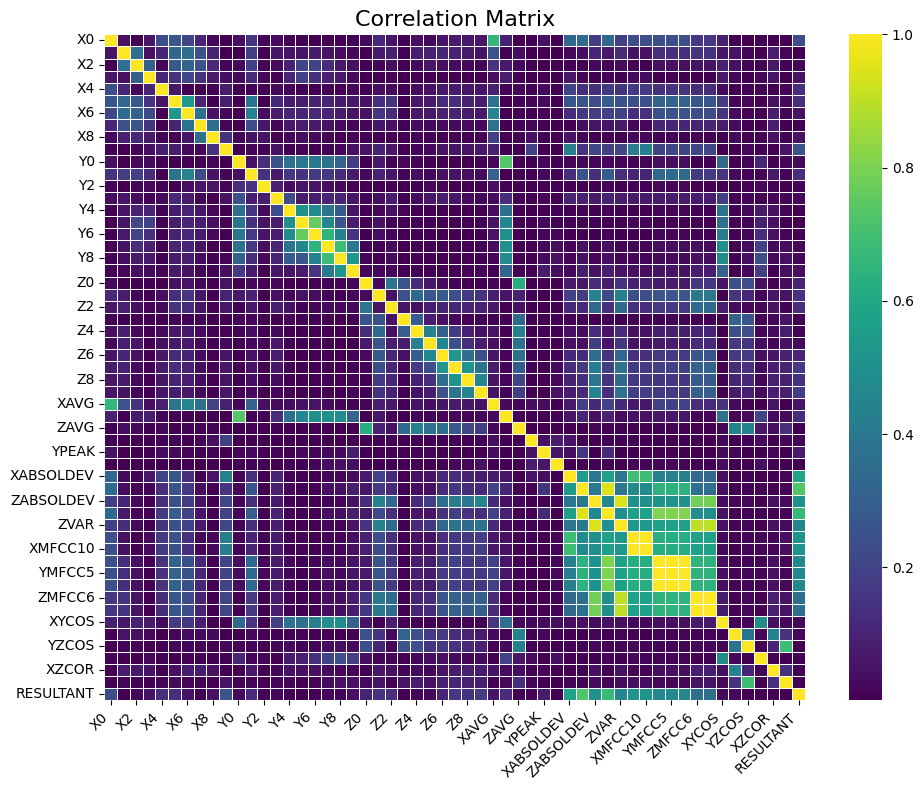

In [279]:
fig, ax = plt.subplots(figsize=(10, 8))
x_corr = X.corr()**2
sns.heatmap(x_corr, cmap='viridis', annot=False, fmt=".2f", linewidths=.5, ax=ax)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [280]:
preprocessing_pipeline = Pipeline(steps=[
    ('quantile_transform', QuantileTransformer(n_quantiles=100,
                                               output_distribution='normal',
                                               random_state=0)),
    ('scaler', StandardScaler())
    ])

X = preprocessing_pipeline.fit_transform(X)

In [281]:
df_sen_dev = df_sen_dev.iloc[data.index,:].to_numpy()

In [282]:
X = np.concatenate([X, df_sen_dev], axis=1)
print(X.shape)

(4399, 59)


In [283]:
class_index = y.index.values
df.iloc[y.index, :].groupby(['ACTIVITY'])['ACTIVITY'].count()

,ACTIVITY
ACTIVITY,
A,352
B,940
C,549
D,164
E,130
F,44
G,52
H,21
I,0


## Model Development

In [284]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [285]:
def fit_predict(clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acu = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap='binary')
    plt.show()
    print('accuracy score: %.4f' % acu)
    print('confusion matrix:')
    print(cm)
    print(metrics.classification_report(y_test, y_pred))
    return acu, cm

In [286]:
def fit_predict(clf):
    """Fits a classifier, makes predictions, and displays evaluation metrics.

    Args:
        clf: The classifier object.
        x_train: Training data features.
        y_train: Training data labels.
        x_test: Testing data features.
        y_test: Testing data labels.

    Returns:
        Tuple: Accuracy score and confusion matrix.
    """

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acu = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap='magma', annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(f'Accuracy Score: {acu:.4f}')
    print(metrics.classification_report(y_test, y_pred))

    return acu, cm

__________________________________________________
Logistic Regression
['A' 'B' 'C' 'D' 'E' 'G' 'I' 'J' 'K' 'L' 'M' 'O' 'P' 'Q' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']


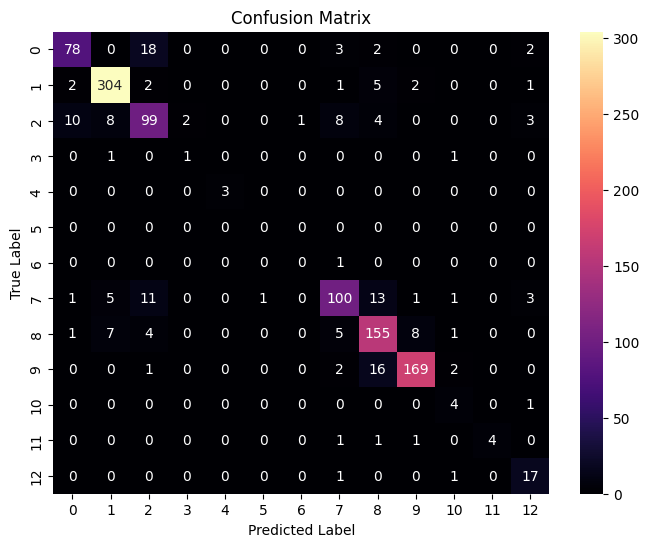

Accuracy Score: 0.8491
              precision    recall  f1-score   support

           A       0.85      0.76      0.80       103
           B       0.94      0.96      0.95       317
           C       0.73      0.73      0.73       135
           D       0.33      0.33      0.33         3
           G       1.00      1.00      1.00         3
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         1
           M       0.82      0.74      0.78       136
           O       0.79      0.86      0.82       181
           P       0.93      0.89      0.91       190
           Q       0.40      0.80      0.53         5
           R       1.00      0.57      0.73         7
           S       0.63      0.89      0.74        19

    accuracy                           0.85      1100
   macro avg       0.65      0.66      0.64      1100
weighted avg       0.85      0.85      0.85      1100

__________________________________________________
Ridge

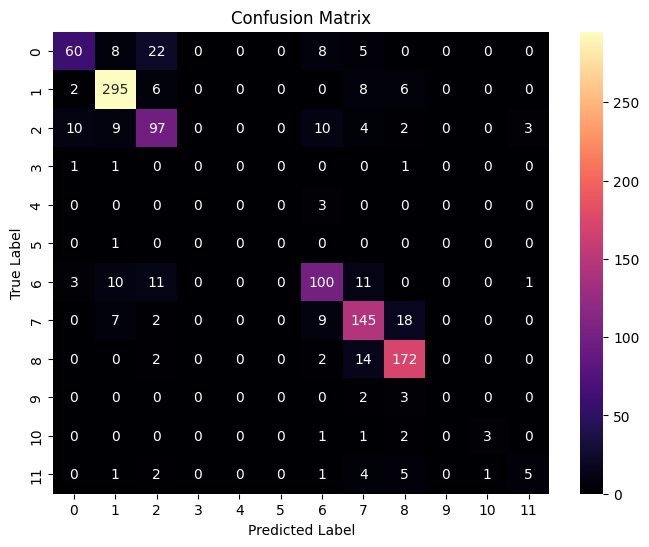

Accuracy Score: 0.7973
              precision    recall  f1-score   support

           A       0.79      0.58      0.67       103
           B       0.89      0.93      0.91       317
           C       0.68      0.72      0.70       135
           D       0.00      0.00      0.00         3
           G       0.00      0.00      0.00         3
           L       0.00      0.00      0.00         1
           M       0.75      0.74      0.74       136
           O       0.75      0.80      0.77       181
           P       0.82      0.91      0.86       190
           Q       0.00      0.00      0.00         5
           R       0.75      0.43      0.55         7
           S       0.56      0.26      0.36        19

    accuracy                           0.80      1100
   macro avg       0.50      0.45      0.46      1100
weighted avg       0.79      0.80      0.79      1100

__________________________________________________
Ridge Classifier CV
['A' 'B' 'C' 'D' 'E' 'G' 'I' 'J' 'K' 'L

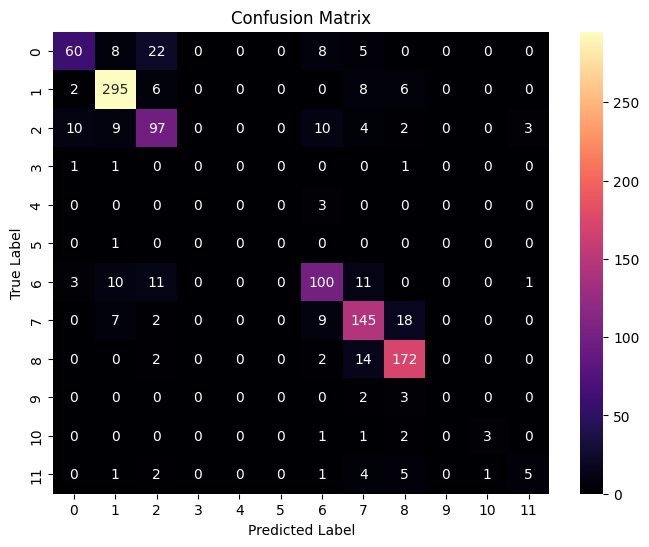

Accuracy Score: 0.7973
              precision    recall  f1-score   support

           A       0.79      0.58      0.67       103
           B       0.89      0.93      0.91       317
           C       0.68      0.72      0.70       135
           D       0.00      0.00      0.00         3
           G       0.00      0.00      0.00         3
           L       0.00      0.00      0.00         1
           M       0.75      0.74      0.74       136
           O       0.75      0.80      0.77       181
           P       0.82      0.91      0.86       190
           Q       0.00      0.00      0.00         5
           R       0.75      0.43      0.55         7
           S       0.56      0.26      0.36        19

    accuracy                           0.80      1100
   macro avg       0.50      0.45      0.46      1100
weighted avg       0.79      0.80      0.79      1100

__________________________________________________
SGD Classifier
['A' 'B' 'C' 'D' 'E' 'G' 'I' 'J' 'K' 'L' 'M'

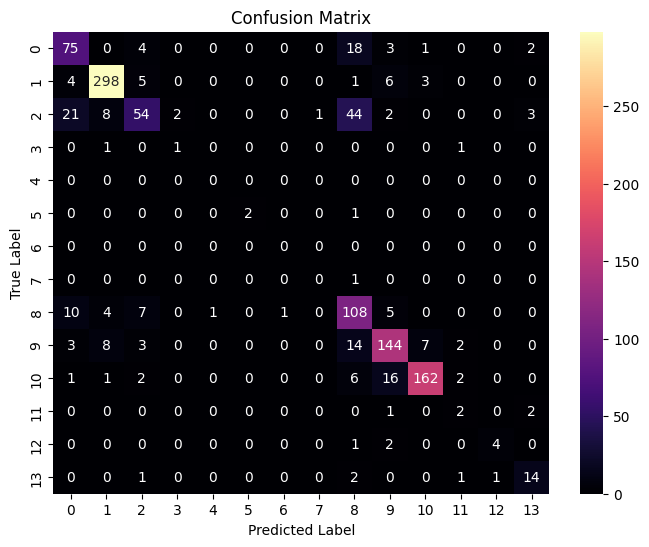

Accuracy Score: 0.7855
              precision    recall  f1-score   support

           A       0.66      0.73      0.69       103
           B       0.93      0.94      0.94       317
           C       0.71      0.40      0.51       135
           D       0.33      0.33      0.33         3
           E       0.00      0.00      0.00         0
           G       1.00      0.67      0.80         3
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         1
           M       0.55      0.79      0.65       136
           O       0.80      0.80      0.80       181
           P       0.94      0.85      0.89       190
           Q       0.25      0.40      0.31         5
           R       0.80      0.57      0.67         7
           S       0.67      0.74      0.70        19

    accuracy                           0.79      1100
   macro avg       0.55      0.52      0.52      1100
weighted avg       0.80      0.79      0.78      1100

__

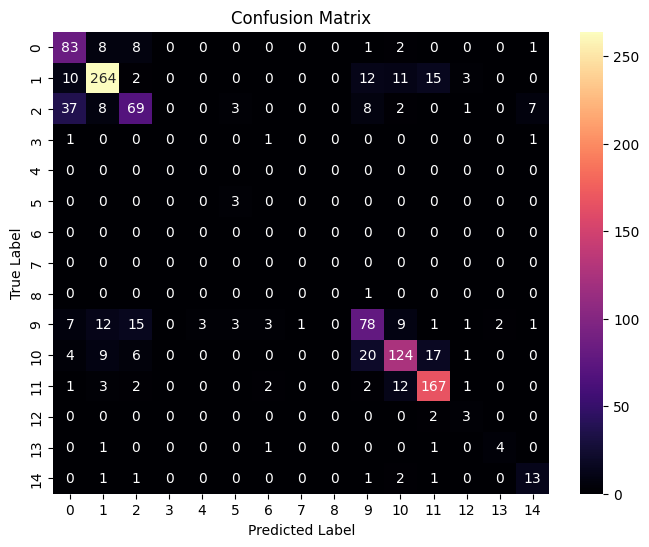

Accuracy Score: 0.7345
              precision    recall  f1-score   support

           A       0.58      0.81      0.67       103
           B       0.86      0.83      0.85       317
           C       0.67      0.51      0.58       135
           D       0.00      0.00      0.00         3
           E       0.00      0.00      0.00         0
           G       0.33      1.00      0.50         3
           I       0.00      0.00      0.00         0
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         1
           M       0.63      0.57      0.60       136
           O       0.77      0.69      0.72       181
           P       0.82      0.88      0.85       190
           Q       0.30      0.60      0.40         5
           R       0.67      0.57      0.62         7
           S       0.57      0.68      0.62        19

    accuracy                           0.73      1100
   macro avg       0.41      0.48      0.43      1100
wei

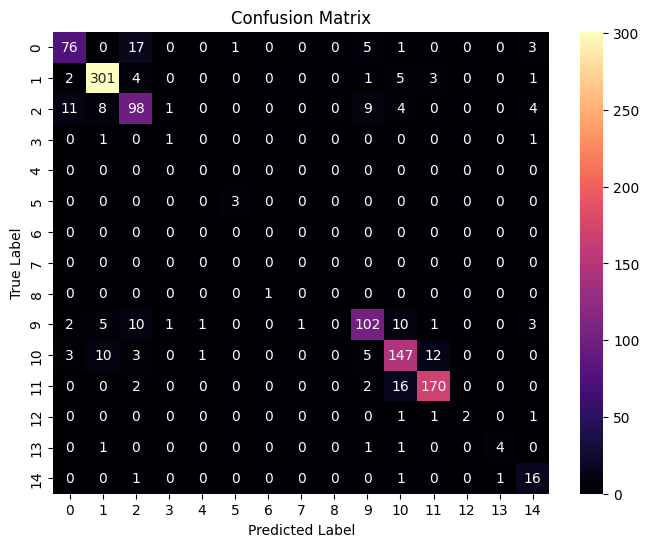

Accuracy Score: 0.8364
              precision    recall  f1-score   support

           A       0.81      0.74      0.77       103
           B       0.92      0.95      0.94       317
           C       0.73      0.73      0.73       135
           D       0.33      0.33      0.33         3
           E       0.00      0.00      0.00         0
           G       0.75      1.00      0.86         3
           I       0.00      0.00      0.00         0
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         1
           M       0.82      0.75      0.78       136
           O       0.79      0.81      0.80       181
           P       0.91      0.89      0.90       190
           Q       1.00      0.40      0.57         5
           R       0.80      0.57      0.67         7
           S       0.55      0.84      0.67        19

    accuracy                           0.84      1100
   macro avg       0.56      0.53      0.53      1100
wei

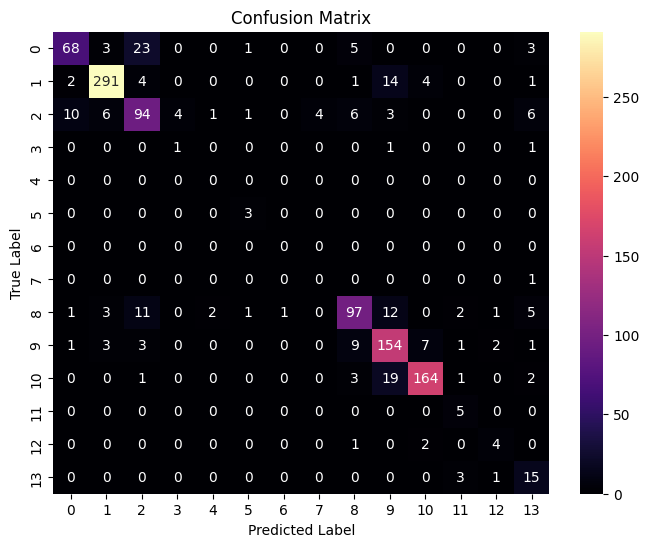

Accuracy Score: 0.8145
              precision    recall  f1-score   support

           A       0.83      0.66      0.74       103
           B       0.95      0.92      0.93       317
           C       0.69      0.70      0.69       135
           D       0.20      0.33      0.25         3
           E       0.00      0.00      0.00         0
           G       0.50      1.00      0.67         3
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         1
           M       0.80      0.71      0.75       136
           O       0.76      0.85      0.80       181
           P       0.93      0.86      0.89       190
           Q       0.42      1.00      0.59         5
           R       0.50      0.57      0.53         7
           S       0.43      0.79      0.56        19

    accuracy                           0.81      1100
   macro avg       0.50      0.60      0.53      1100
weighted avg       0.83      0.81      0.82      1100

__

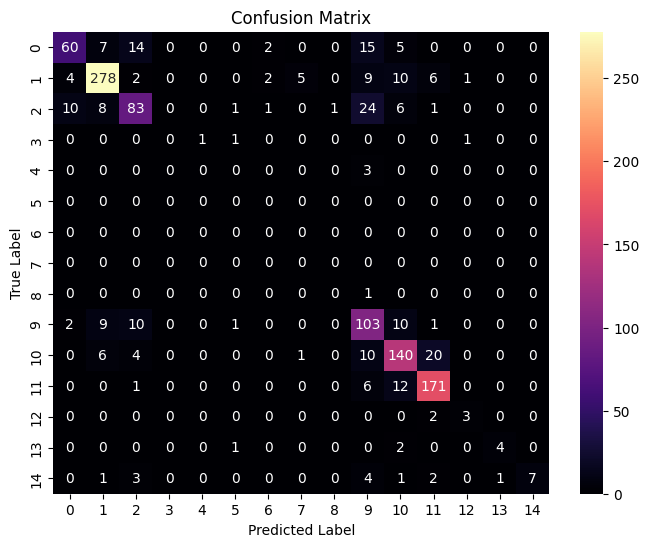

Accuracy Score: 0.7718
              precision    recall  f1-score   support

           A       0.79      0.58      0.67       103
           B       0.90      0.88      0.89       317
           C       0.71      0.61      0.66       135
           D       0.00      0.00      0.00         3
           G       0.00      0.00      0.00         3
           I       0.00      0.00      0.00         0
           J       0.00      0.00      0.00         0
           K       0.00      0.00      0.00         0
           L       0.00      0.00      0.00         1
           M       0.59      0.76      0.66       136
           O       0.75      0.77      0.76       181
           P       0.84      0.90      0.87       190
           Q       0.60      0.60      0.60         5
           R       0.80      0.57      0.67         7
           S       1.00      0.37      0.54        19

    accuracy                           0.77      1100
   macro avg       0.47      0.40      0.42      1100
wei

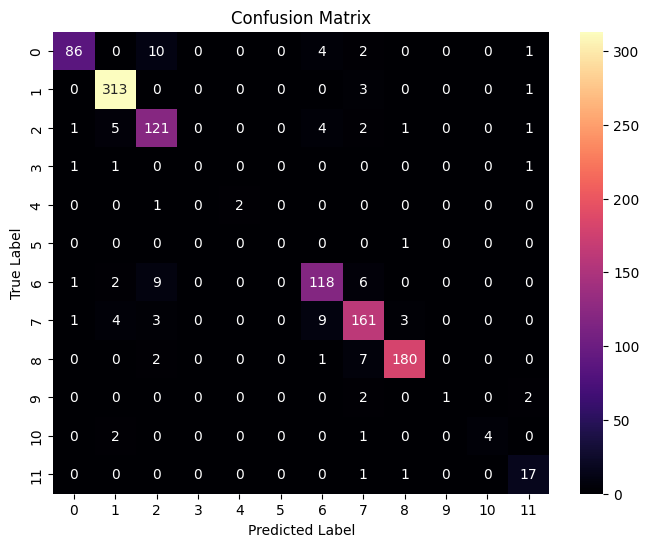

Accuracy Score: 0.9118
              precision    recall  f1-score   support

           A       0.96      0.83      0.89       103
           B       0.96      0.99      0.97       317
           C       0.83      0.90      0.86       135
           D       0.00      0.00      0.00         3
           G       1.00      0.67      0.80         3
           L       0.00      0.00      0.00         1
           M       0.87      0.87      0.87       136
           O       0.87      0.89      0.88       181
           P       0.97      0.95      0.96       190
           Q       1.00      0.20      0.33         5
           R       1.00      0.57      0.73         7
           S       0.74      0.89      0.81        19

    accuracy                           0.91      1100
   macro avg       0.77      0.65      0.67      1100
weighted avg       0.91      0.91      0.91      1100



In [294]:
model_list =[
    (linear_model.LogisticRegression(max_iter=int(5e3), penalty='elasticnet', solver='saga', l1_ratio=0.45), 'Logistic Regression'),
    (linear_model.RidgeClassifier(random_state=0), 'Ridge Classifier'),
    (linear_model.RidgeClassifierCV(alphas=[1e-3, 1e-2, .1, .4, .75, 1]), 'Ridge Classifier CV'),
    (linear_model.SGDClassifier(random_state=0), 'SGD Classifier'),
    (linear_model.Perceptron(random_state=0), 'Perceptron'),
    (svm.LinearSVC(random_state=0), 'Lienar SVC'),
    (LinearDiscriminantAnalysis(), 'LDA'),
    (linear_model.PassiveAggressiveClassifier(C=.5, random_state=0), 'Passive Aggressive Classifier'),
    (RandomForestClassifier(random_state=0), 'Random Forest Classifier'),
    ]

results=[]

for clf, name in model_list:
    print('_'*50)
    print(name)
    print(np.sort(data['ACTIVITY'].unique()))
    print(['A=walking', 'B=Jogging', "P=Dribbling(Basketball)", "R=Clapping", "S=Folding Clothes"])
    results.append((fit_predict(clf), name))